In [1]:
#importing libraries

from matplotlib import pyplot as plt
from matplotlib import style as st
import seaborn as sns
import numpy as np
import pandas as pd
import string
import warnings
%matplotlib inline

#importing the dataset and copying it

train = pd.read_csv('C:/Users/Kailash Patel/Analysis_Project/Analysis Project/Datasets/train_ctrUa4K.csv')
test = pd.read_csv('C:/Users/Kailash Patel/Analysis_Project/Analysis Project/Datasets/test_lAUu6dG.csv')

train.head()
test.head()

train_orig = train.copy()
test_orig = test.copy()

In [2]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [3]:
train['Gender'] = train['Gender'].fillna(train['Gender'].dropna().mode().values[0] )
train['Married'] = train['Married'].fillna(train['Married'].dropna().mode().values[0] )
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].dropna().mode().values[0] )
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].dropna().mode().values[0] )
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].dropna().mode().values[0] )
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].dropna().mode().values[0] )
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].dropna().mode().values[0] )

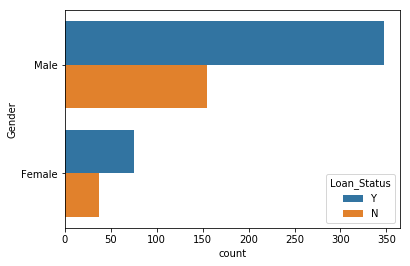

In [4]:
sns.countplot(y='Gender', hue='Loan_Status', data=train)

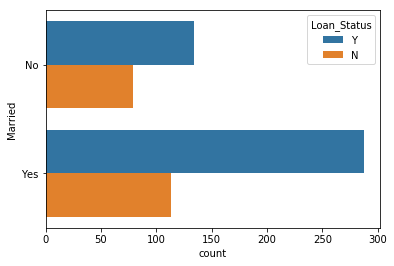

In [5]:
sns.countplot(y='Married', hue='Loan_Status', data=train)

In [6]:
code_numeric={'Male':1, 'Female':2, 'Yes':1, 'No':2, 'Graduate':1, 'Not Graduate':2, 'Urban':3, 'Semiurban':2, 'Rural':1, 'Y':1
             , 'N':0, '3+':3}

In [7]:
train=train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
test=test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [8]:
train.drop('Loan_ID', axis=1, inplace=True)

In [9]:
train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [10]:
dep_train=pd.to_numeric(train.Dependents)
dep_test=pd.to_numeric(test.Dependents)

In [11]:
train.drop(['Dependents'], axis = 1, inplace = True)
test.drop(['Dependents'], axis = 1, inplace = True)

In [12]:
train = pd.concat([train, dep_train], axis = 1)
test = pd.concat([test, dep_test], axis = 1)

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null float64
Married              367 non-null int64
Education            367 non-null int64
Self_Employed        344 non-null float64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null int64
Dependents           357 non-null float64
dtypes: float64(6), int64(5), object(1)
memory usage: 34.5+ KB


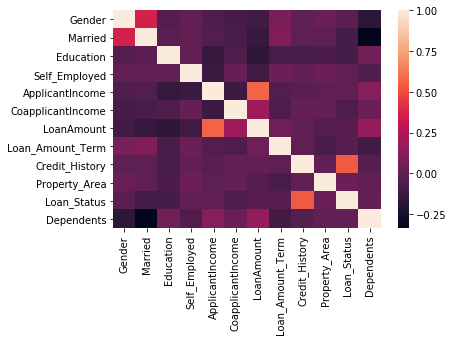

In [14]:
sns.heatmap(train.corr())

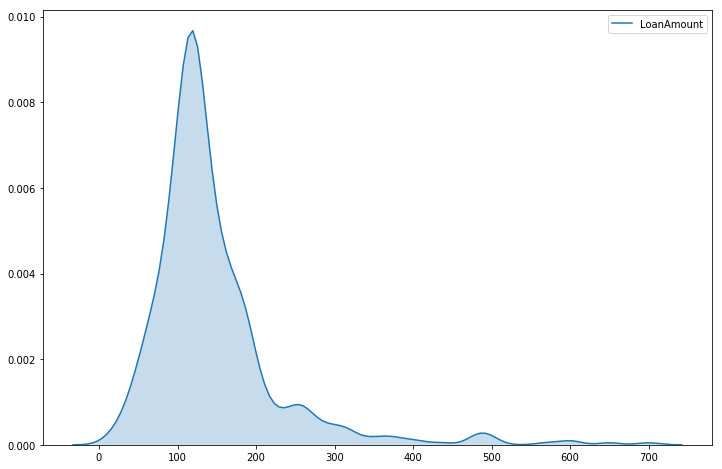

In [26]:
plt.figure(figsize=(12,8))
x=sns.kdeplot(data=train['LoanAmount'], shade=True)
plt.show(x)

In [21]:
y=train['Loan_Status']
X=train.drop('Loan_Status', axis=1)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model=LogisticRegression()
model.fit(X_train, y_train)
ypred=model.predict(X_test)
evaluation=f1_score(y_test, ypred)
evaluation

0.8979591836734695

In [32]:
y_test.shape

(123,)

AttributeError: 'numpy.ndarray' object has no attribute 'count'